In [71]:
import numpy as np
import soundfile as sf               # Zum Einlesen und Schreiben von Audiodateien (z.B. .wav)
import matplotlib.pyplot as plt      # Plot-Bibliothek für Diagramme, Signale, Bilder etc.
import matplotlib.image as mpimg     # Modul zum Einlesen von Bilddateien (z.B. JPEG, PNG) für plt

from scipy.signal import find_peaks  # Findet lokale Maxima in 1D-Daten (z.B. Peaks im Spektrum)
from scipy.fft import (
    fft,         # 1D-FFT: schnelle Fourier-Transformation für 1D-Signale (z.B. Audio)
    fft2,        # 2D-FFT: Fourier-Transformation für 2D-Daten (z.B. Bilder)

    fftfreq,     # Frequenzachsen-Werte passend zur FFT (für Achsenbeschriftung/Analyse)

    fftshift,    # Verschiebt die Nullfrequenz in die Bildmitte (z.B. für Darstellung)
    ifftshift,   # Rückverschiebung: Macht fftshift rückgängig (vor Inverse-FFT)

    ifft2        # Inverse 2D-FFT: Zurück von Frequenz- in Bild-/Raumdarstellung
)


In [72]:
# Datei einlesen (tab-getrennt, mehrere Paare pro Zeile)
data = np.loadtxt("Daten/sunspots.txt", delimiter="\t")

# Jetzt sind die Daten 2D: jede Zeile hat z.B. [year1, val1, year2, val2, ..., yearN, valN]
# Wir machen daraus zwei Arrays:
years = data[:, ::2].flatten()       # Alle geraden Spalten (Jahre)
sunspots = data[:, 1::2].flatten()   # Alle ungeraden Spalten (Werte)

# Vorschau der letzten 10 Werte
print(years[-10:])
print(sunspots[-10:])

[2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014.]
[29.8 15.2  7.6  2.9  3.1 16.5 55.7 57.6 64.7 79.3]


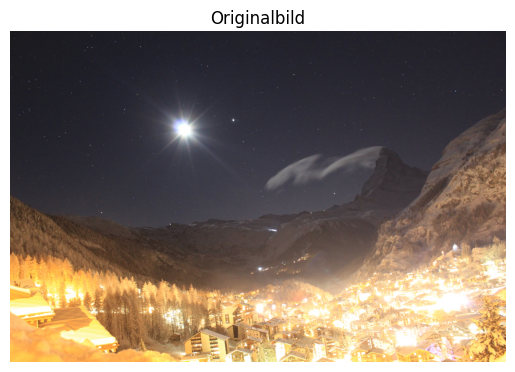

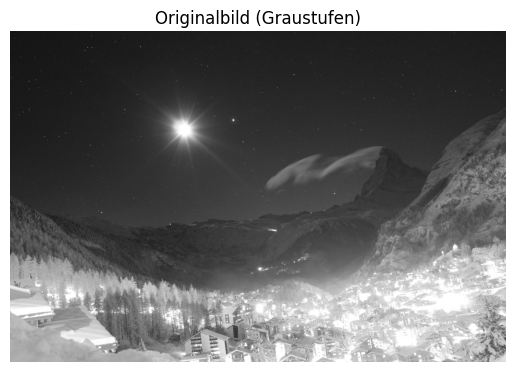

In [60]:
# Bild laden
img = mpimg.imread("Daten/img.jpg")
if img.dtype != np.float32 and img.dtype != np.float64:
    img = img / 255.0

# Falls es ein Farb-Bild ist (RGB), umwandeln in Graustufen
if img.ndim == 3:
    img_gray = img.mean(axis=2)
else:
    img_gray = img

# Anzeigen
plt.imshow(img)
plt.axis('off')
plt.title("Originalbild")
plt.show()

plt.imshow(img_gray, cmap='gray')
plt.title("Originalbild (Graustufen)")
plt.axis("off")
plt.show()

## 1a)

In [17]:
def fourier_komponente(x, y, k, L):
    """
    Berechnet die k-te Fourier-Komponente einer Funktion f(x), gegeben durch
    die Stützstellen x und Funktionswerte y = f(x), mit der Trapezregel.

    Parameters:
        x (ndarray): Array mit Stützstellen im Intervall [-L, L]
        y (ndarray): Array mit Funktionswerten f(x)
        k (int): Index der Fourier-Komponente (k ∈ ℤ)
        L (float): Halbe Periodenlänge des Intervalls (z.B. bei [-3, 3] ist L = 3)

    Returns:
        c_k (complex): k-te Fourier-Komponente
    """
    integrand = y * np.exp(-1j * k * np.pi * x / L)
    c_k = (1 / (2 * L)) * np.trapezoid(integrand, x)
    return c_k

## 1b)

In [15]:
def fourier_approximation(x, y, m, L):
    """
    Berechnet die Fourier-Approximation f_app(x) mit 2m + 1 Komponenten.

    Parameters:
        x (ndarray): Stützstellen x im Intervall [-L, L]
        y (ndarray): Funktionswerte f(x)
        m (int): Maximale Frequenzkomponente (Symmetrisch um 0)
        L (float): Halbe Periodenlänge

    Returns:
        f_app (ndarray): Approximierte Funktion an den Punkten x
    """
    f_app = np.zeros_like(x, dtype=complex)
    for k in range(-m, m + 1):
        c_k = fourier_komponente(x, y, k, L)
        f_app += c_k * np.exp(1j * k * np.pi * x / L)
    return np.real(f_app)


## 1c)

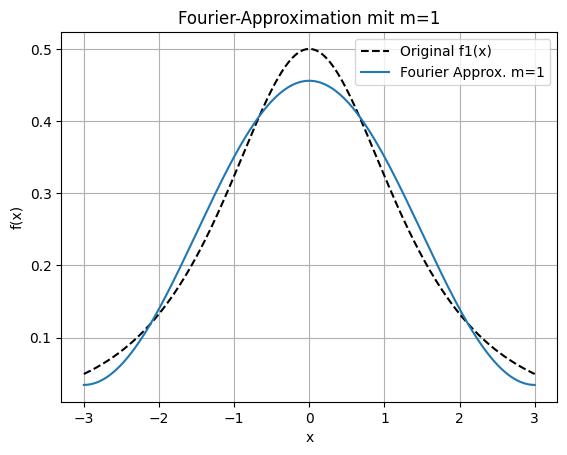

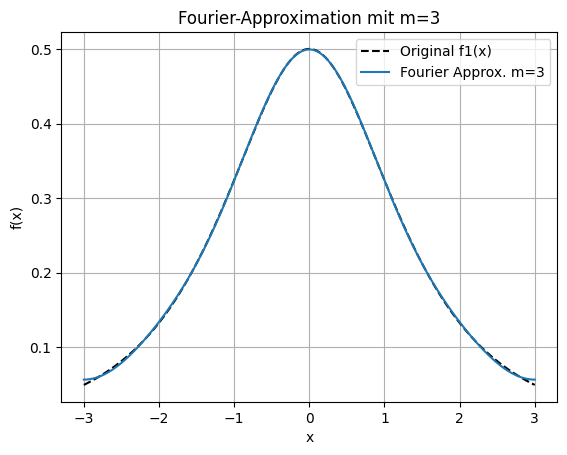

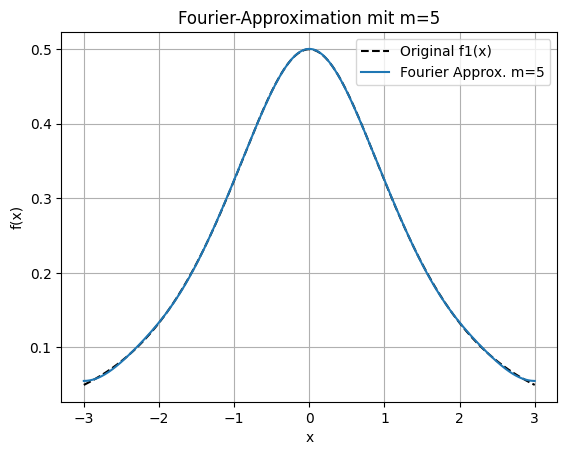

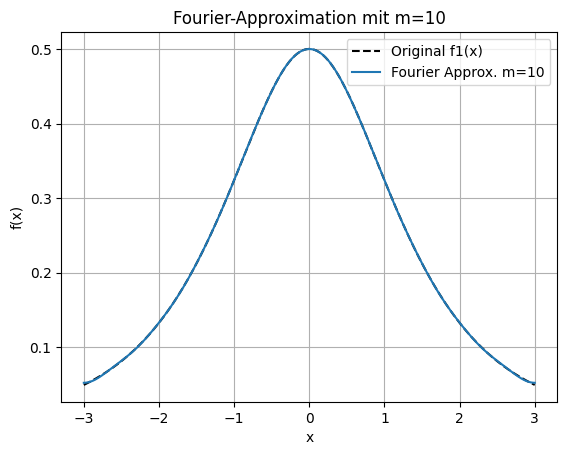

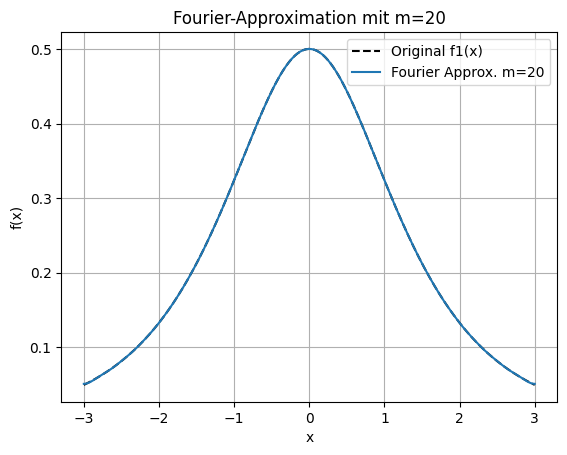

In [18]:
# Definitionsbereich
N = 600
L = 3
x = np.linspace(-L, L, N)
f1 = 1 / (np.exp(x) + np.exp(-x))  # = sech(x)

# Test mit verschiedenen m
for m in [1, 3, 5, 10, 20]:
    f_app = fourier_approximation(x, f1, m, L)
    plt.plot(x, f1, label="Original f1(x)", color="black", linestyle="--")
    plt.plot(x, f_app, label=f"Fourier Approx. m={m}")
    plt.title(f"Fourier-Approximation mit m={m}")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid()
    plt.show()


## 1d)

In [19]:
def relative_fehler(f_orig, f_approx):
    return np.linalg.norm(f_orig - f_approx) / np.linalg.norm(f_orig)

# Finde kleinstes m mit Fehler < 0.1%
target_error = 0.001
for m in range(1, 100):
    f_app = fourier_approximation(x, f1, m, L)
    fehler = relative_fehler(f1, f_app)
    print(f"m = {m}, Fehler = {fehler:.6f}")
    if fehler < target_error:
        print(f"\n✅ Minimales m mit Fehler < 0.1%: m = {m}")
        break


m = 1, Fehler = 0.084830
m = 2, Fehler = 0.026520
m = 3, Fehler = 0.004915
m = 4, Fehler = 0.004839
m = 5, Fehler = 0.003244
m = 6, Fehler = 0.002623
m = 7, Fehler = 0.002123
m = 8, Fehler = 0.001776
m = 9, Fehler = 0.001513
m = 10, Fehler = 0.001311
m = 11, Fehler = 0.001151
m = 12, Fehler = 0.001021
m = 13, Fehler = 0.000915

✅ Minimales m mit Fehler < 0.1%: m = 13


## 1e)

In [20]:
f2 = np.exp(x)
f3 = np.exp(np.abs(x))

# Fehlerberechnung wie oben
for label, f_test in [("f2(x) = exp(x)", f2), ("f3(x) = exp(|x|)", f3)]:
    for m in range(1, 100):
        f_app = fourier_approximation(x, f_test, m, L)
        fehler = relative_fehler(f_test, f_app)
        if fehler < target_error:
            print(f"✅ {label}: Minimales m = {m}, Fehler = {fehler:.6f}")
            break


✅ f3(x) = exp(|x|): Minimales m = 93, Fehler = 0.001000


## 2a)

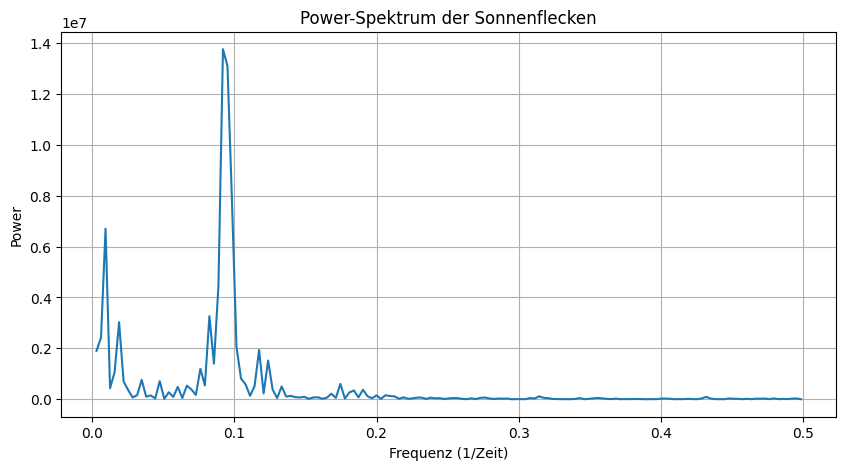

Dominante Frequenz: 0.09206 (1/Jahre)
Geschätzte Periodizität des Sonnenzyklus: 10.86 Jahre


In [30]:
N = len(sunspots)
dt = years[1] - years[0]  # Zeitabstand, sollte konstant sein
freqs = fftfreq(N, dt)
fft_vals = fft(sunspots)
power = np.abs(fft_vals)**2

# Nur positive Frequenzen anzeigen
mask = freqs > 0

plt.figure(figsize=(10, 5))
plt.plot(freqs[mask], power[mask])
plt.xlabel("Frequenz (1/Zeit)")
plt.ylabel("Power")
plt.title("Power-Spektrum der Sonnenflecken")
plt.grid()
plt.show()

# Dominante Frequenz
dom_idx = np.argmax(power[mask])
dom_freq = freqs[mask][dom_idx]
dom_period = 1 / dom_freq
print(f"Dominante Frequenz: {dom_freq:.5f} (1/Jahre)")
print(f"Geschätzte Periodizität des Sonnenzyklus: {dom_period:.2f} Jahre")

## 2b)

Weitere signifikante Perioden:
  ~105.00 Jahre
  ~52.50 Jahre
  ~13.12 Jahre
  ~12.12 Jahre
  ~10.86 Jahre
  ~8.51 Jahre
  ~8.08 Jahre


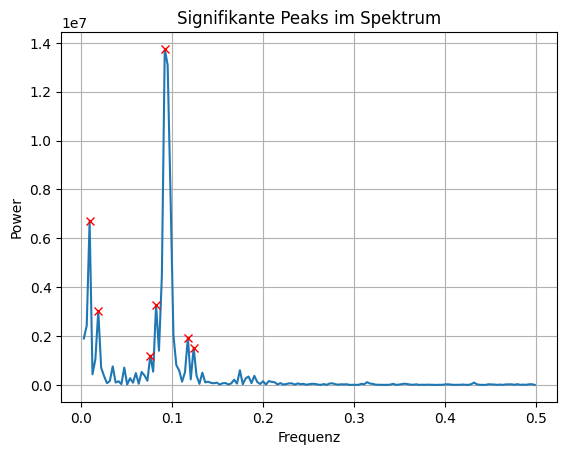

In [32]:
peaks, _ = find_peaks(power[mask], height=1e6)  # Schwelle anpassen je nach Skala
peak_freqs = freqs[mask][peaks]
peak_periods = 1 / peak_freqs

print("Weitere signifikante Perioden:")
for p in peak_periods:
    print(f"  ~{p:.2f} Jahre")

# Optional plot
plt.plot(freqs[mask], power[mask])
plt.plot(peak_freqs, power[mask][peaks], "rx")
plt.title("Signifikante Peaks im Spektrum")
plt.xlabel("Frequenz")
plt.ylabel("Power")
plt.grid()
plt.show()

## 2c)

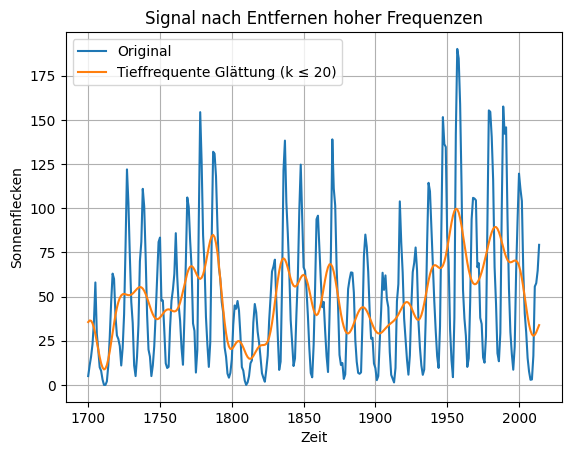

In [34]:
fft_cut_high = fft_vals.copy()
fft_cut_high[21:-21] = 0  # Nur die zentralen (niedrigen) Frequenzen behalten

sunspots_smooth = np.real(np.fft.ifft(fft_cut_high))

plt.plot(years, sunspots, label="Original")
plt.plot(years, sunspots_smooth, label="Tieffrequente Glättung (k ≤ 20)")
plt.legend()
plt.title("Signal nach Entfernen hoher Frequenzen")
plt.xlabel("Zeit")
plt.ylabel("Sonnenflecken")
plt.grid()
plt.show()


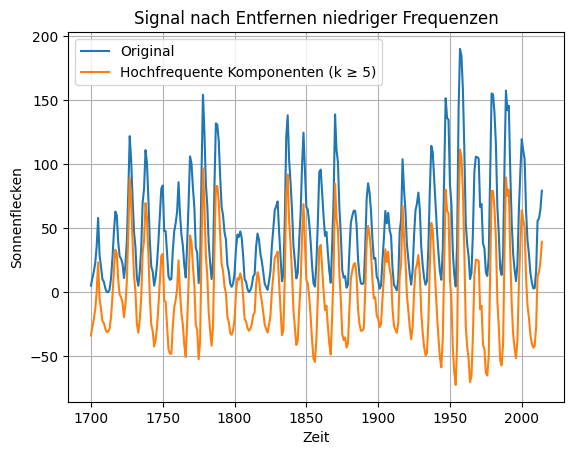

In [35]:
fft_cut_low = fft_vals.copy()
fft_cut_low[:5] = 0
fft_cut_low[-4:] = 0  # Symmetrisch (Nyquist-Spiegelung)

sunspots_detail = np.real(np.fft.ifft(fft_cut_low))

plt.plot(years, sunspots, label="Original")
plt.plot(years, sunspots_detail, label="Hochfrequente Komponenten (k ≥ 5)")
plt.legend()
plt.title("Signal nach Entfernen niedriger Frequenzen")
plt.xlabel("Zeit")
plt.ylabel("Sonnenflecken")
plt.grid()
plt.show()

## 2d)

Vergleichspunkt | Aufgabe 1 (synthetisch) | Aufgabe 2 (reale Daten)
|---|---|---|
Signalart | Glatt, exakt periodisch | Real, verrauscht, quasiperiodisch
Fourier-Koeffizienten | Exakt berechenbar, symmetrisch | FFT-basiert, realistischere Spektren
Konvergenzverhalten | Schnell (bes. bei glatten f(x)) | Langsamer wegen Rauschen und Unstetigkeit
Anwendung | Theorie & Approximation | Analyse, Filterung, Periodenerkennung

Fazit:
- FFT ist ideal zur Analyse realer Daten, aber schwerer zu interpretieren als bei analytischen Funktionen.
- Das Entfernen von Frequenzanteilen zeigt klar, wie tiefe Frequenzen für langsame Trends und hohe für Rauschen und Details verantwortlich sind.
- Die dominante Periode im Power-Spektrum gibt dir die Sonnenzykluslänge!



Warum ist das Spektrum symmetrisch?

Weil das Signal reellwertig ist, gilt:
$X(-f) = \overline{X(f)}$

Daher ist der Betrag (Amplitude) symmetrisch um f=0f=0. Bei realen Signalen ist das immer der Fall.

In [76]:
audio_data, sample_rate = sf.read("Daten/music.wav")

# Metadaten: Shape, Länge [s], Sample Rate [Hz]
print(f"Shape: {audio_data.shape}")
duration = len(audio_data) / sample_rate
print(f"Länge: {duration:.2f} Sekunden")
print(f"Sample rate: {sample_rate} Hz")

# Check for Channels
if audio_data.ndim > 1:
    print("Audio is stereo, converting to mono.")
    audio_data = audio_data.mean(axis=1)  # Konvertiere zu Mono
else:
    print("Audio already mono.")

Shape: (157173, 2)
Länge: 3.56 Sekunden
Sample rate: 44100 Hz
Audio is stereo, converting to mono.


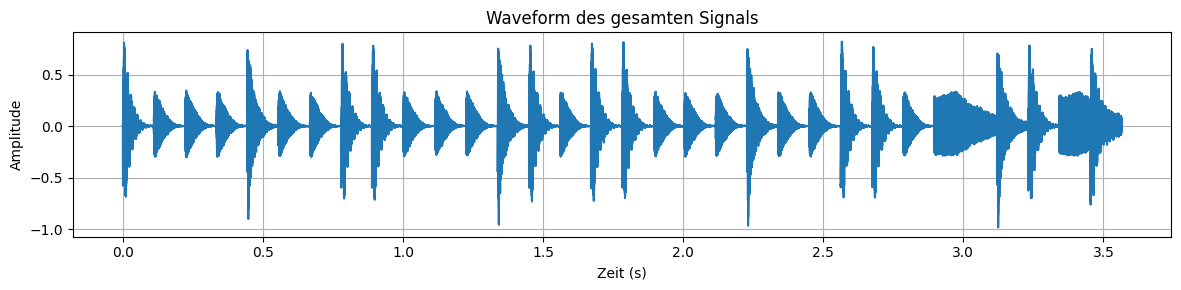

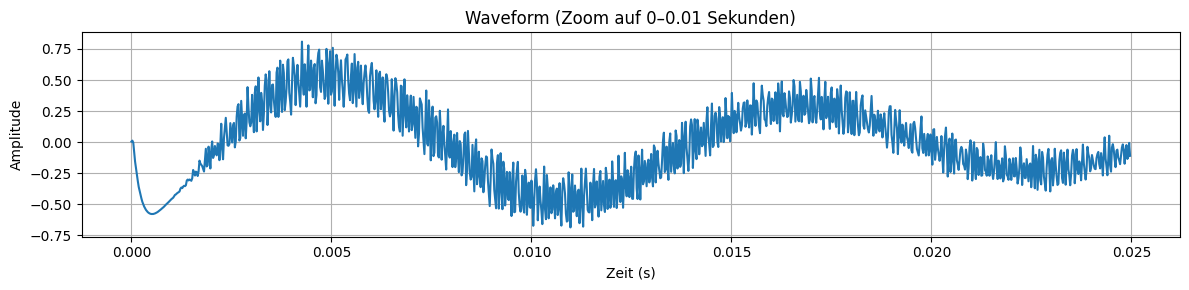

In [59]:
time = np.linspace(0, len(audio_data) / sample_rate, len(audio_data))

plt.figure(figsize=(12, 3))
plt.plot(time, audio_data)
plt.title("Waveform des gesamten Signals")
plt.xlabel("Zeit (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.tight_layout()
plt.show()

# Zoom (z.B. erste 0.01 s)
zoom_range = int(sample_rate * 0.025)

plt.figure(figsize=(12, 3))
plt.plot(time[:zoom_range], audio_data[:zoom_range])
plt.title("Waveform (Zoom auf 0–0.01 Sekunden)")
plt.xlabel("Zeit (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.tight_layout()
plt.show()

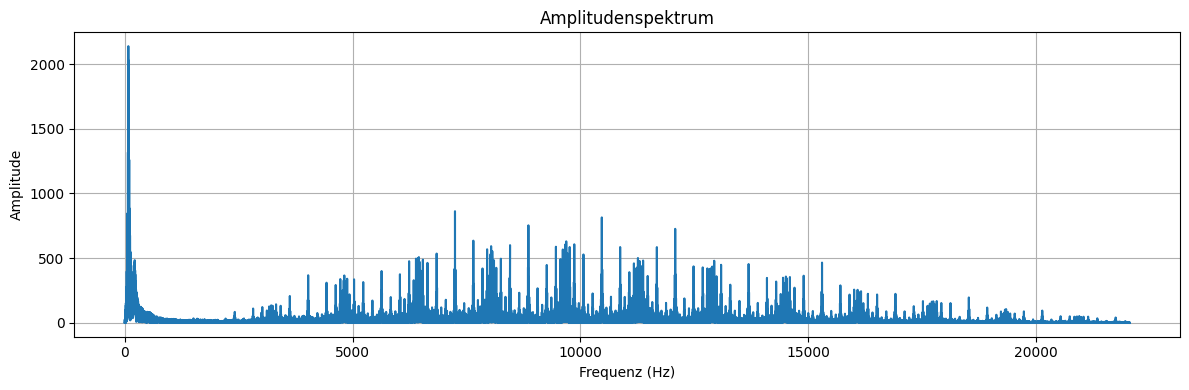

In [40]:
N = len(audio_data)
freqs = fftfreq(N, d=1/sample_rate)
fft_vals = fft(audio_data)
amplitude = np.abs(fft_vals)

mask = freqs >= 0  # nur positive Frequenzen

plt.figure(figsize=(12, 4))
plt.plot(freqs[mask], amplitude[mask])
plt.title("Amplitudenspektrum")
plt.xlabel("Frequenz (Hz)")
plt.ylabel("Amplitude")
plt.grid()
plt.tight_layout()
plt.show()

## 3b)

In [41]:
# Grenzfrequenz in Hz
cutoff = 2000

low_mask = (freqs >= 0) & (freqs < cutoff)
high_mask = (freqs >= cutoff)

# Top 5 Frequenzen unterhalb von 2kHz
top_low_indices = np.argsort(amplitude[low_mask])[-5:]
top_low_freqs = freqs[low_mask][top_low_indices]

# Top 5 Frequenzen oberhalb von 2kHz
top_high_indices = np.argsort(amplitude[high_mask])[-5:]
top_high_freqs = freqs[high_mask][top_high_indices]

print("Top 5 Frequenzen < 2kHz:", np.round(top_low_freqs, 2))
print("Top 5 Frequenzen ≥ 2kHz:", np.round(top_high_freqs, 2))


Top 5 Frequenzen < 2kHz: [71.83 90.91 89.79 81.93 80.81]
Top 5 Frequenzen ≥ 2kHz: [ 7649.52 12078.24  8857.43 10467.69  7246.89]


## 3c)

In [43]:
# Kopien vorbereiten
fft_low = np.zeros_like(fft_vals)
fft_high = np.zeros_like(fft_vals)

# Frequenzen maskieren
fft_low[low_mask] = fft_vals[low_mask]
fft_low[-sum(low_mask):] = fft_vals[-sum(low_mask):]  # Spiegel

fft_high[high_mask] = fft_vals[high_mask]
fft_high[-sum(high_mask):] = fft_vals[-sum(high_mask):]  # Spiegel

# Rücktransformation
reconstructed_low = np.real(np.fft.ifft(fft_low))
reconstructed_high = np.real(np.fft.ifft(fft_high))


def relative_error(original, reconstructed):
    return np.linalg.norm(original - reconstructed) / np.linalg.norm(original)

error_low = relative_error(audio_data, reconstructed_low)
error_high = relative_error(audio_data, reconstructed_high)

print(f"Relativer Fehler (<2kHz): {error_low:.4%}")
print(f"Relativer Fehler (≥2kHz): {error_high:.4%}")


Relativer Fehler (<2kHz): 66.9558%
Relativer Fehler (≥2kHz): 37.1684%


In [45]:
sf.write("Daten/output/output_low.wav", reconstructed_low, sample_rate)
sf.write("Daten/output/output_high.wav", reconstructed_high, sample_rate)

## 4a)

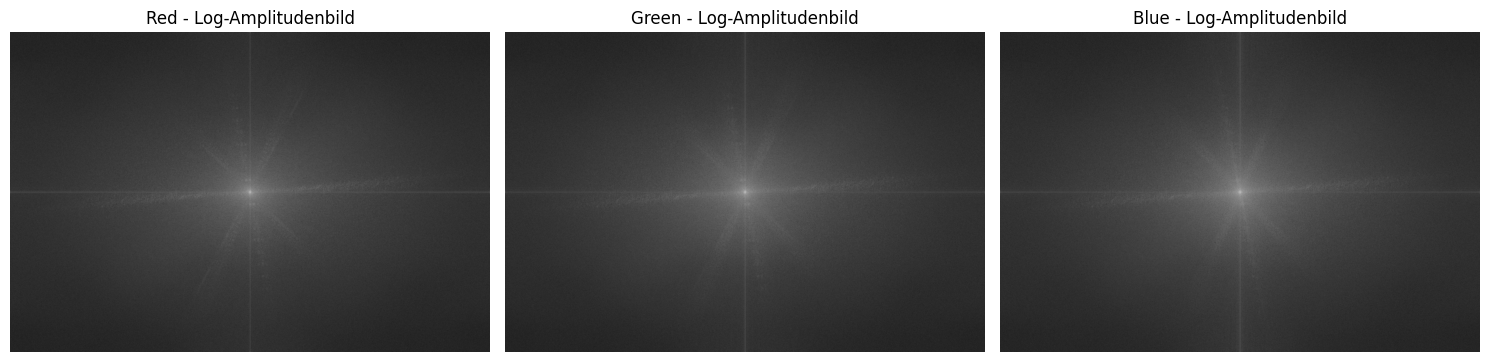

In [61]:
def plot_fft_amplitude_rgb(image_rgb):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    channels = ['Red', 'Green', 'Blue']

    for i in range(3):
        F = fftshift(fft2(image_rgb[:, :, i]))
        magnitude = np.abs(F)
        axes[i].imshow(np.log1p(magnitude), cmap='gray')
        axes[i].set_title(f"{channels[i]} - Log-Amplitudenbild")
        axes[i].axis("off")

    plt.tight_layout()
    plt.show()

plot_fft_amplitude_rgb(img)

In [62]:
thresholds = [0.00001, 0.0001, 0.001, 0.01, 0.1]  # relative Amplituden-Schwellen

def filter_fft_rgb(img_rgb, threshold):
    reconstructed = np.zeros_like(img_rgb)
    spectrum_display = []

    for i in range(3):
        F = fft2(img_rgb[:, :, i])
        F_shift = fftshift(F)
        mag = np.abs(F_shift)
        max_val = mag.max()

        # Schwellenwertmaske
        mask = mag >= threshold * max_val
        F_filtered = F_shift * mask
        spectrum_display.append(np.log1p(np.abs(F_filtered)))

        # Rück-Transformation
        F_inv = ifft2(ifftshift(F_filtered))
        reconstructed[:, :, i] = np.real(F_inv)

    return np.clip(reconstructed, 0, 1), spectrum_display


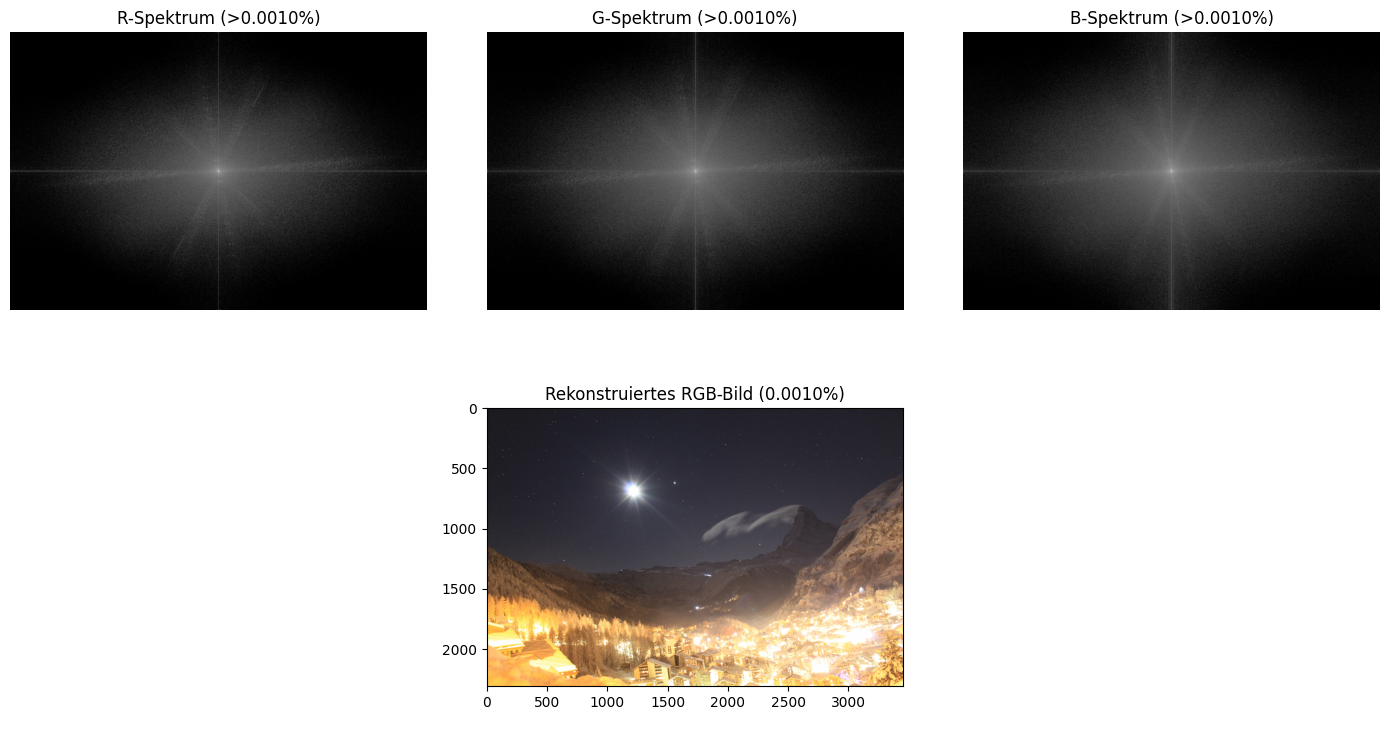

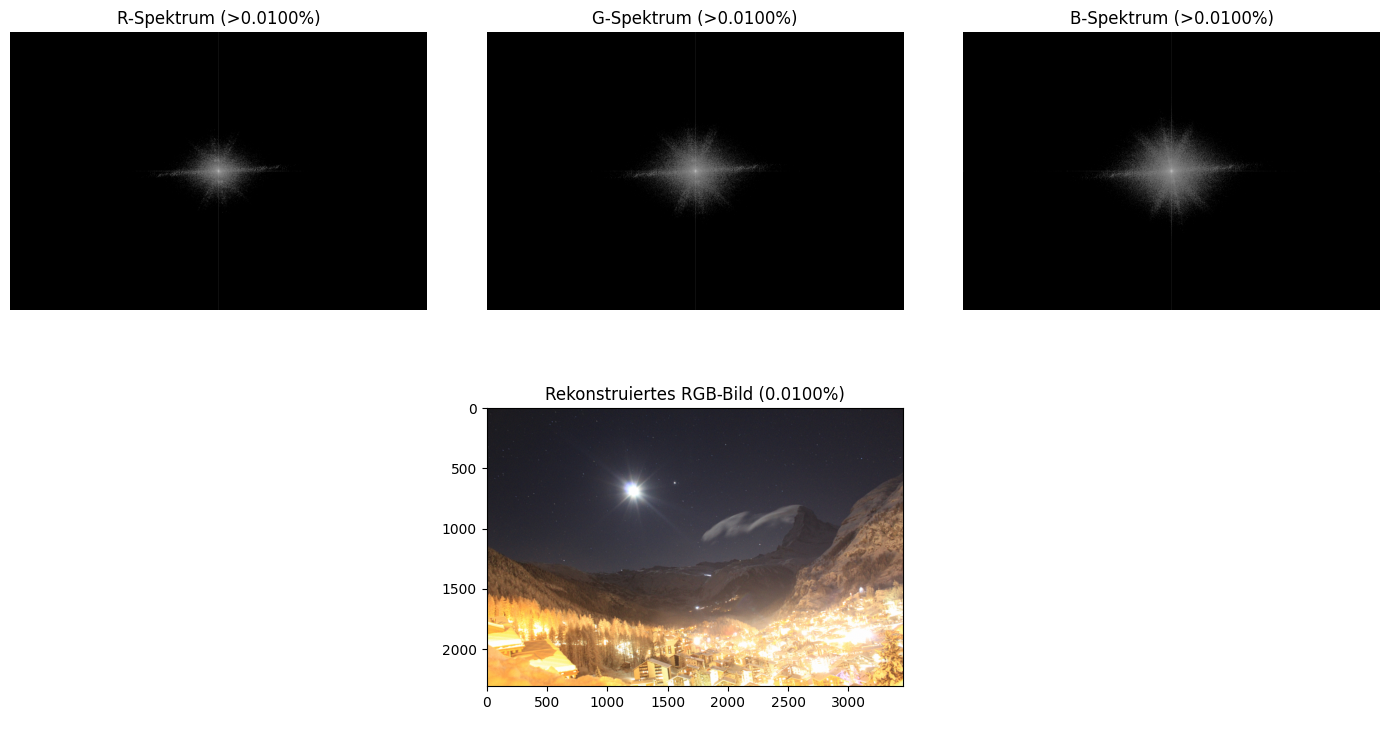

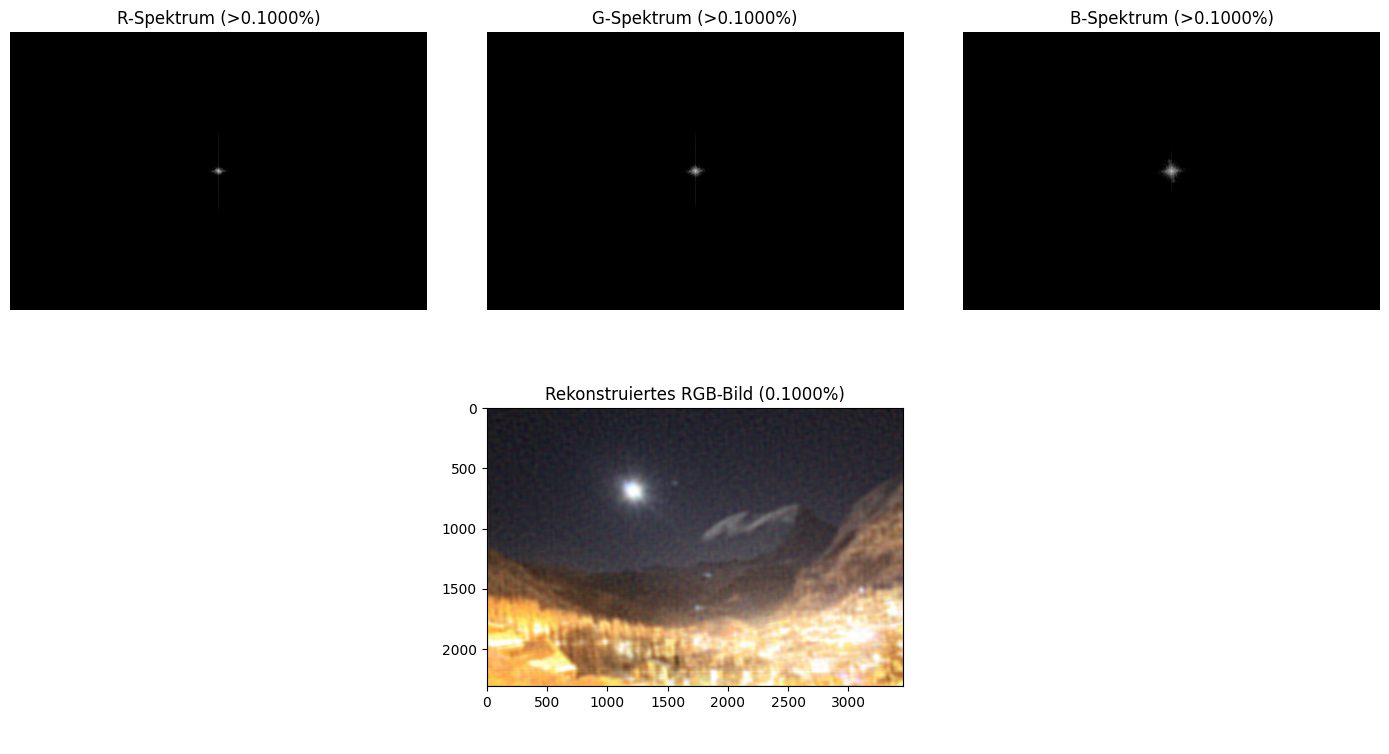

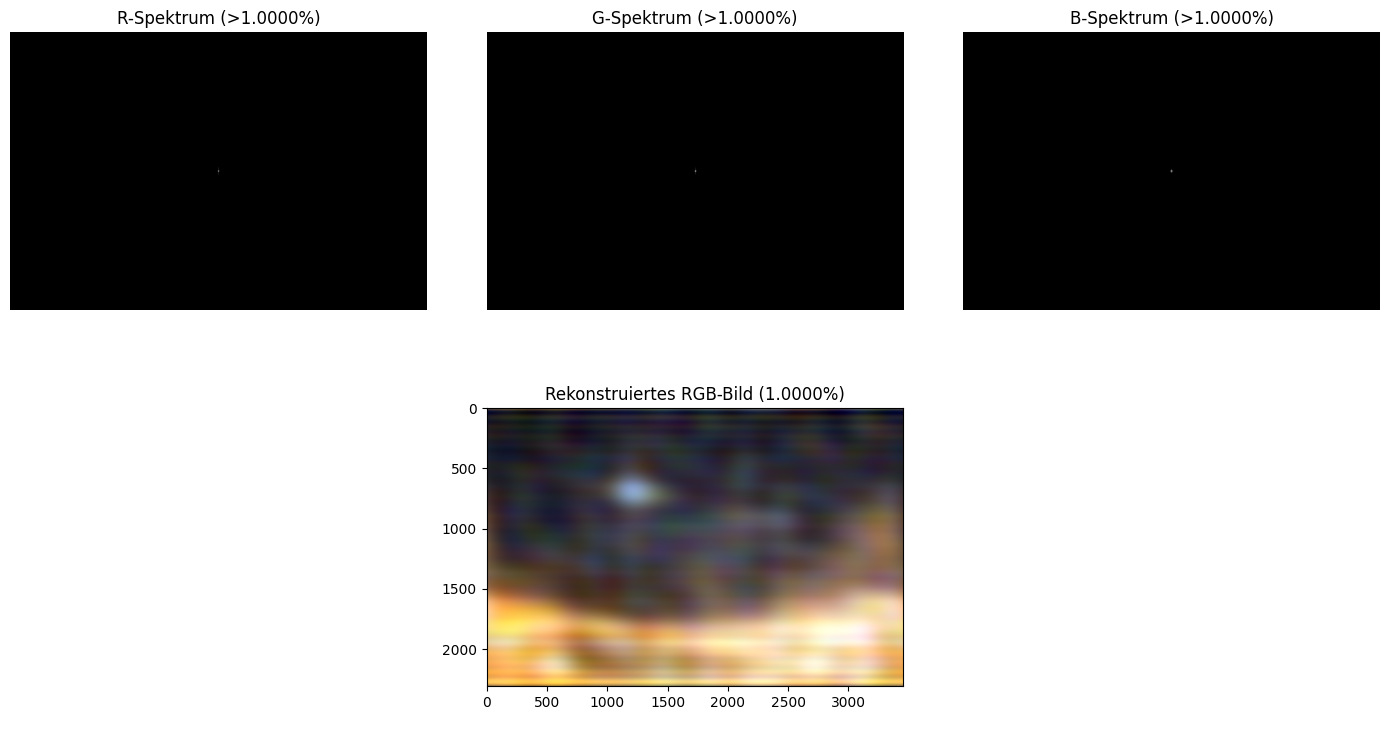

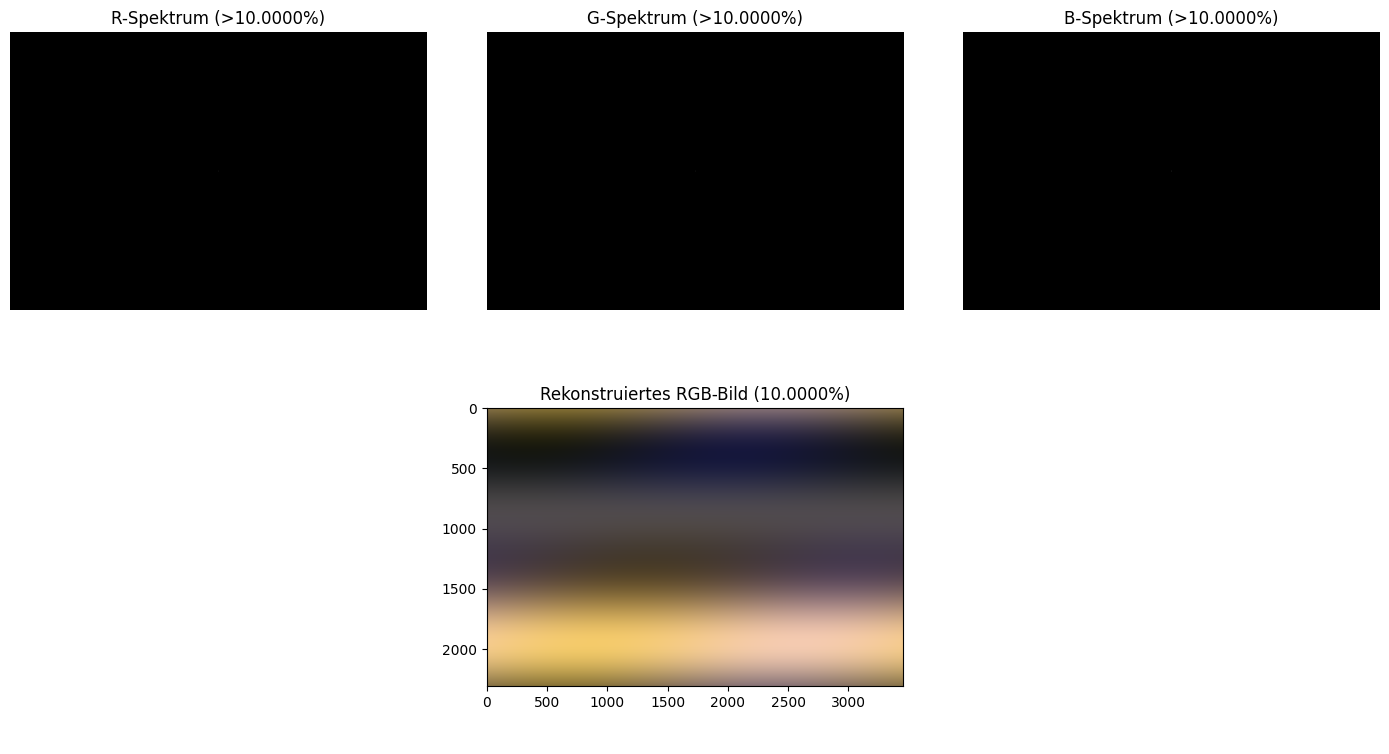

In [65]:
for t in thresholds:
    recon_img, spectra = filter_fft_rgb(img, t)

    fig, axes = plt.subplots(2, 3, figsize=(14, 8))
    for i, channel in enumerate(['R', 'G', 'B']):
        axes[0, i].imshow(spectra[i], cmap='gray')
        axes[0, i].set_title(f"{channel}-Spektrum (>{t*100:.4f}%)")
        axes[0, i].axis("off")

    axes[1, 1].imshow(recon_img)
    axes[1, 1].set_title(f"Rekonstruiertes RGB-Bild ({t*100:.4f}%)")
    axes[1, 0].axis("off")
    axes[1, 2].axis("off")

    plt.tight_layout()
    plt.show()


In [69]:
def rel_error(original, reconstructed):
    return np.linalg.norm(original - reconstructed) / np.linalg.norm(original)

print("Fehleranalyse pro Schwelle:")
for t in thresholds:
    recon, _ = filter_fft_rgb(img, t)
    err = rel_error(img, recon)
    print(f"Schwelle: {t*100:.4f}%, Fehler: {err:.4%}")


Fehleranalyse pro Schwelle:
Schwelle: 0.0010%, Fehler: 1.0084%
Schwelle: 0.0100%, Fehler: 4.2046%
Schwelle: 0.1000%, Fehler: 10.0619%
Schwelle: 1.0000%, Fehler: 17.4635%
Schwelle: 10.0000%, Fehler: 32.2213%
